
## Holt-Winters Exponentielle Glätttung (Übung)

Manuals:

* Exponentielle Glättung, Beispiele: https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html
* statsmodels.tsa.holtwinters.ExponentialSmoothing: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html
* .fit: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.fit.html#statsmodels.tsa.holtwinters.ExponentialSmoothing.fit
* .forecast: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.HoltWintersResults.forecast.html#statsmodels.tsa.holtwinters.HoltWintersResults.forecast
* results: https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.HoltWintersResults.html#statsmodels.tsa.holtwinters.HoltWintersResults



### Vorhersage von Passagierzahlen

Leiten Sie aus dem vorgegebenen Datensatz ab, wie sich die Zahl der Passagiere in den nächsten zwei Jahren entwickeln wird.



In [1]:
%reset -f

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

fn = 'data/a10.csv'

df = pd.read_csv(fn, parse_dates=['date'], index_col='date')
df=df.resample("MS").agg('mean')
df.head(3)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221


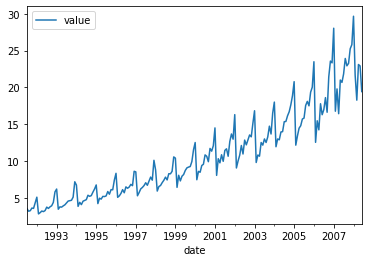

In [2]:
ax = df.plot()

In [4]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
import plotly_express as px

dh = df.copy()

sc = MinMaxScaler(feature_range = (0.00001,1))
dh['scal'] = sc.fit_transform(dh)

model = ExponentialSmoothing(dh['scal'], trend='add',  seasonal='add', use_boxcox=True,
                           seasonal_periods=12)

dmodel = model.fit()

dh['fitted'] = sc.inverse_transform([dmodel.fittedvalues.tolist()])[0,:]
dhfc = pd.DataFrame(dmodel.forecast(36))
dhfc['forecast'] = sc.inverse_transform([dhfc.iloc[:,0].tolist()])[0,:]

result = pd.concat([df["value"], dh["fitted"], dhfc['forecast']], axis=1)

plot = px.line(result)
plot.show()